<a href="https://colab.research.google.com/github/jmren168/PdM/blob/master/NRF04_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits # digit dataset

# load dataset
digits = load_digits()

# features and target
X = digits.data 
y = digits.target

from sklearn.neighbors import KNeighborsClassifier # knn for classification
from sklearn.model_selection import train_test_split # split訓練及測試資料

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) # 依2:1隨機切割出training set and test set

# fit data
clf = KNeighborsClassifier(n_neighbors=10) # n_neighbors: 鄰居個數
clf.fit(X_train, y_train)

# outside prediction
y_pred_test = clf.predict(X_test)

# inside prediction
y_pred_train = clf.predict(X_train)

# calculate performance
acc_outside = sum((y_test - y_pred_test)==0) / len(y_test) * 100
acc_inside = sum((y_train - y_pred_train)==0) / len(y_train) * 100

print('KNN')
print("inside accuracy: {:.2f}%".format(acc_inside))
print("outside accuracy: {:.2f}%".format(acc_outside))

KNN
inside accuracy: 98.58%
outside accuracy: 97.33%


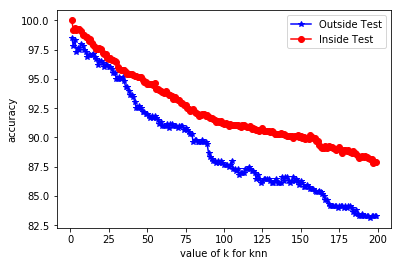

In [0]:
import matplotlib.pyplot as plt

# use different values of k to evaluate the performance 
acc_outside_list=[]
acc_inside_list=[]
k_range = range(1,200)

for k in k_range:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)
  
  # outside test
  y_pred_test = clf.predict(X_test)
  accuracy = sum((y_test - y_pred_test)==0) / len(y_test) * 100
  acc_outside_list.append(accuracy)
  
  # inside test
  y_pred_train = clf.predict(X_train)
  accuracy = sum((y_train - y_pred_train)==0) / len(y_train) * 100
  acc_inside_list.append(accuracy)

# plot the accuracy under different values of k
plt.plot(k_range, acc_outside_list, 'b*-')
plt.plot(k_range, acc_inside_list, 'ro-')
plt.xlabel('value of k for knn')
plt.ylabel('accuracy')
plt.legend(['Outside Test', 'Inside Test'])